In [1]:
using OrdinaryDiffEq
using Plots

In [2]:
kp = 1 # pathogen
kpi = 4 # interaction between pathogen and inflammatory components
kip = 1 # interaction between inflammatory and pathogen
ktp = 1 # temperature grows under pathogen ?
kpt = 1   # pathogen growth slows under high temperature
ki =  1   # rate of clearance of inflammatory components
kai = 1   # anti inflammatory components reduce inflammatory comp. growth
kia = 1   # inflammatory components increase growth of anti inflammatory
kit = 1 #  body temp decreases inflammatory comp. growth
kti = 1   # inflammatory increases body temp.
ka = 1    # rate of clearance of anti inflam. comp.
kat = 1  # anti inflammatory decreases body temp
kta = 1 # temp increases anti infl. comp ?
kt = 1  # natural rate of cooling of the body
param = [kp,kpi,kip,ktp,kpt,ki,kai,kia,kit,kti,ka,kat,kta,kt];

In [3]:
function sepsis4D!(du, u, param, t)
    
    kp, kpi, kip, ktp, kpt, ki, kai, kia, kit, kti, ka, kat, kta, kt = param
        
    du[1] = kp*u[1]*(1-u[1]) - kip*u[2]*u[1] - ktp*u[4]*u[1]
    
    du[2] = kpi*u[1]*u[2] - ki*u[2] - kai*u[3]*u[2]
    
    du[3] = kia*u[2]*u[3]  - ka*u[3] - kat*u[3]*u[4]
    
    du[4] = kit*u[2]*u[4] + kpt*u[1]*u[4] - kat*u[3]*u[4] - kt*u[4]
end

sepsis4D! (generic function with 1 method)

In [6]:
u0 = [0.3; 0.01; 0; 0]
tspan = (0.0, 10.0)
prob = ODEProblem(sepsis4D!, u0, tspan, param)
sol = solve(prob)

fig1 = plot(sol, labels=["P(t)" "I(t)" "A(t)" "T(t)"])
fig1 = hline!([0.2], label = "Elimination")
savefig(fig1, "fig4-1.png")

"/home/jw/thesis_research/fig4-1.png"

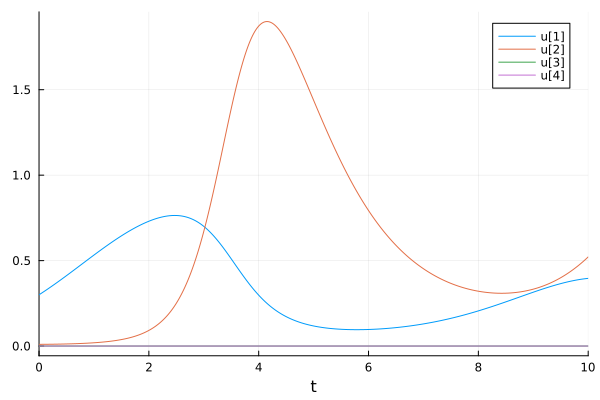

In [5]:
u0 = [0.3; 0.01; 0; 0]
tspan = (0.0, 10.0)
prob = ODEProblem(sepsis4D!, u0, tspan, param)
sol = solve(prob)

fig1 = plot(sol, labels=["P(t)" "I(t)" "A(t)" "T(t)"])
fig1 = hline!([0.2], label = "Elimination")
savefig(fig1, "fig4-1.png")